# **Practica 3: Análisis estadístico de señales**

### Andres Banquez
### Melina Villada
### Grupo 7


**Implementación de funciones (0.5)**


 *  Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como: 

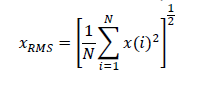

In [1]:
import scipy as sp
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller


In [2]:
def RMS(data: np.array) -> float:
    N = len(data)
    data = data**2
    sum = np.sum(data)
    MS = sum/N
    return MS**(1/2) 

Para este laboratorio, se le suministra el archivo de datos denominado signals.mat, el cual corresponde al registro de señales ECG y EMG.

Las señales se adquirieron a una tasa de muestreo de 1024 Hz. El registro correspondiente a las señales tal cual se registraron corresponde al campo asRecording de los archivos entregados. Las señales se sometieron a un proceso de filtrado el cual corresponde al campo filtered.

In [3]:
data = sp.io.loadmat('signals.mat')

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])

In [5]:
Fs = data['Fs'].flatten()[0]
Ts = 1/Fs
N = len(data['ECG_asRecording'].flatten())

**Análisis estadístico de ECG (2.0)** 

1. A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo.

In [6]:
tiempoTotal = N*Ts # 30s
print(f'El tiempo es {tiempoTotal}s')
t = np.arange(0, tiempoTotal, Ts)
print(t)

El tiempo es 30.0s
[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


2. Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

La filtrada y la sin filtrar tienen la misma longitud


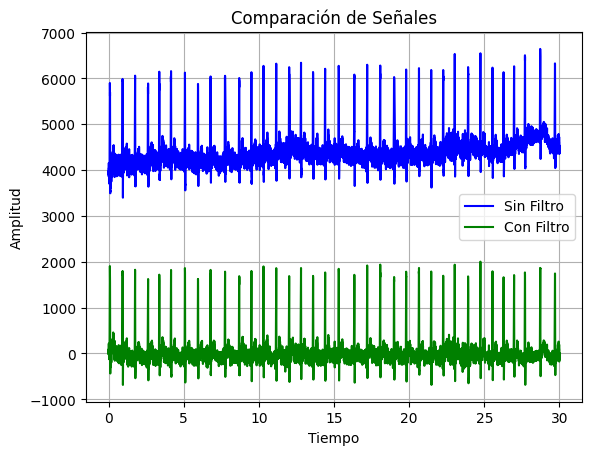

In [7]:
sF = data['ECG_asRecording'].flatten()
cF = data['ECG_filtered'].flatten()
if (len(cF) == len(sF)):
    print("La filtrada y la sin filtrar tienen la misma longitud")
plt.figure()
plt.plot(t,sF, color = "blue")
plt.plot(t,cF, color = 'green')
plt.legend(['Sin Filtro', 'Con Filtro'])
plt.title('Comparación de Señales')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

Lo miramos recortado entre 0 y 1000

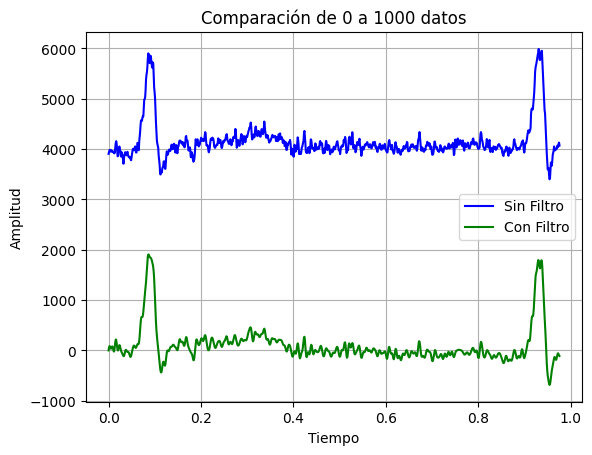

In [8]:
t2 = t[0:1000]
sF2 = data['ECG_asRecording'].flatten()[0:1000]
cF2 = data['ECG_filtered'].flatten()[0:1000]
plt.figure()
plt.plot(t2,sF2, color = "blue")
plt.plot(t2,cF2, color = 'green')
plt.legend(['Sin Filtro', 'Con Filtro'])
plt.title('Comparación de 0 a 1000 datos')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

Existe un movimiento oscilatorio de baja frecuencia que deberia de ser eliminado por el filtro (Un filtro pasaaltas) y además existe un offset y una señal a alta frecuencia que se nota en la comparación de 0 a 1s donde hay un ruido pequeño en toda la señal sin filtrar que es de alta frecuencia y se eliminaria con otro filtro (Un filtro pasabaja). Sin embargo, el filtro es efectivo en mantener las señales correspondientes a la onda PQRS.
Debido a que es una señal biologica debe tener un filtro notch a 60hz.

3. Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

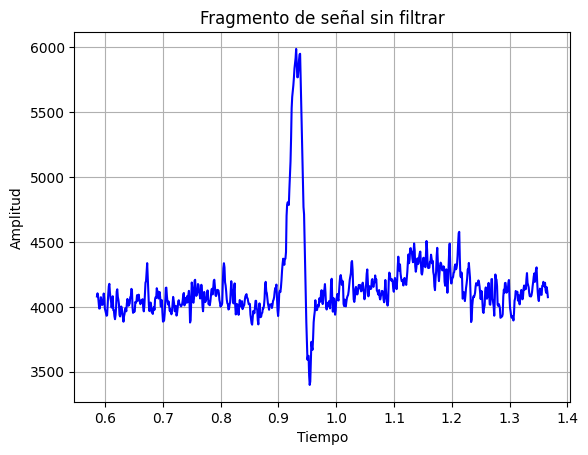

In [9]:
t3 = t[600:1400]
sF3 = data['ECG_asRecording'].flatten()[600:1400]
plt.plot(t3,sF3, color = "blue")
plt.title('Fragmento de señal sin filtrar')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

In [10]:
rms = RMS(sF3)
mean = np.mean(sF3)
std = np.std(sF3)
var = np.var(sF3)
print(f'''
      La raiz cuadratica media (RMS) es: {rms}
      El valor promedio es: {mean}
      La desviación estandar es: {std}
      La varianza: {var}''')


      La raiz cuadratica media (RMS) es: 4170.619751211114
      El valor promedio es: 4159.31981842041
      La desviación estandar es: 306.80247275316873
      La varianza: 94127.75728745884


Los resultados muestran una alta varianza lo que es congruente debido a que la señal ECG esta compuesta por picos pronunciados y una amplitud considerable. En el caso del promedio, el valor puede estar influenciado por el offset y los picos que presenta la señal. Todos estos resultados son esperados debido a la naturaleza de la señal.


El valor promedio y el RMS son altos porque hay un offset de la señal, que no es eliminado hasta el filtrado.

4. Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.

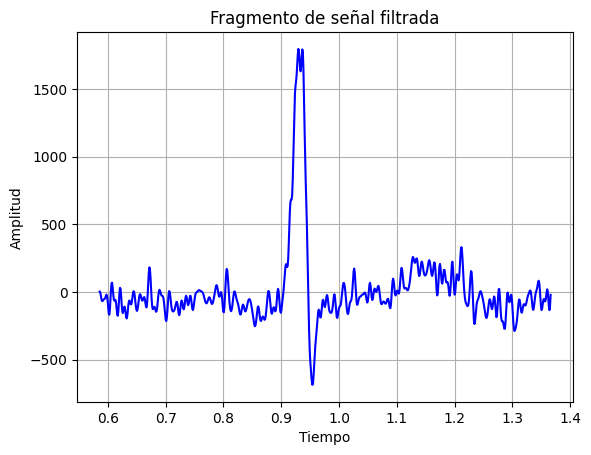

In [11]:
t4 = t[600:1400]
sF4 = data['ECG_filtered'].flatten()[600:1400]
plt.plot(t4,sF4, color = "blue")
plt.title('Fragmento de señal filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

In [12]:
rms = RMS(sF4)
mean = np.mean(sF4)
std = np.std(sF4)
var = np.var(sF4)
print(f'''
      La raiz cuadratica media (RMS) es: {rms}
      El valor promedio es: {mean}
      La desviación estandar es: {std}
      La varianza: {var}''')


      La raiz cuadratica media (RMS) es: 300.59902287957834
      El valor promedio es: 8.146604122810016
      La desviación estandar es: 300.4886110943699
      La varianza: 90293.40539742347


Al reducir los ruidos de altas y bajas frecuencias de la señal, las medidas estadisticas también cambiaron considerablemente:
* Respecto al RMS, ha disminuido considerablemente después de aplicar el filtro, esto debido a las señales de alta y baja frecuencia que fueron eliminadas y a la eliminación del offset de la señal.
* El valor promedio ha bajado considerablemente, esto debido a la eliminación del offset en la señal 

Sin emabrgo, la naturaleza de la señal hace que métricas como la varianza y la desviación no hayan disminuido en un valor importante debido a que la señal sigue presentando sus picos caracteristicos del complejo PQRS.

5. Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?


      La raiz cuadratica media (RMS) es: 319.62757818893766
      El valor promedio es: 74.00995782055861
      La varianza: 96684.31488232457
      La desviación estandar es: 310.94101511753735
      


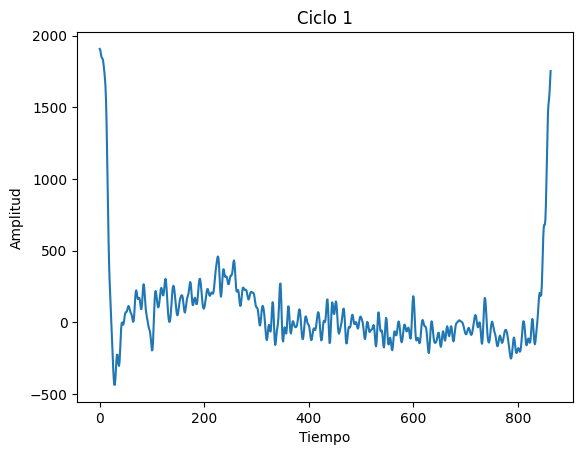


      La raiz cuadratica media (RMS) es: 323.71685872741466
      El valor promedio es: -1.4625781779933433
      La varianza: 104790.46548941819
      La desviación estandar es: 323.7135546890463
      


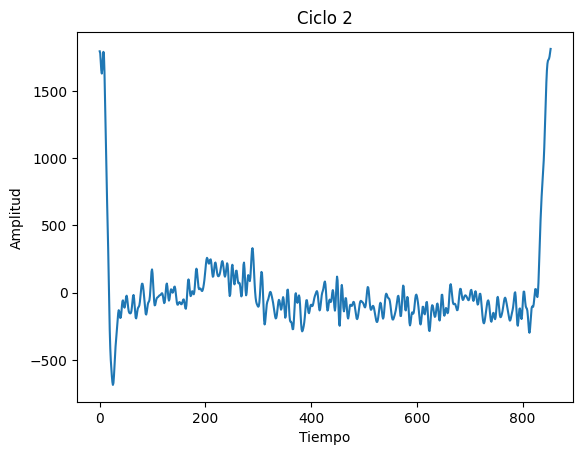


      La raiz cuadratica media (RMS) es: 287.3327314672184
      El valor promedio es: -10.433000231133212
      La varianza: 82451.25107858983
      La desviación estandar es: 287.1432588074981
      


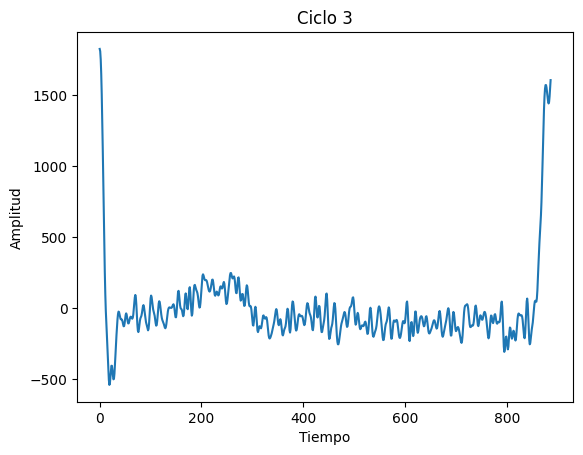


      La raiz cuadratica media (RMS) es: 217.43729621701803
      El valor promedio es: -20.975177997377532
      La varianza: 46839.01969414558
      La desviación estandar es: 216.4232420377848
      


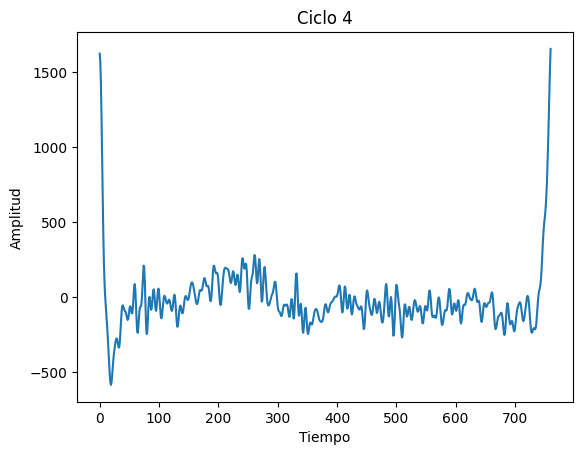


      La raiz cuadratica media (RMS) es: 341.35094444116964
      El valor promedio es: 40.87110478533409
      La varianza: 114850.02006450474
      La desviación estandar es: 338.89529365942036
      


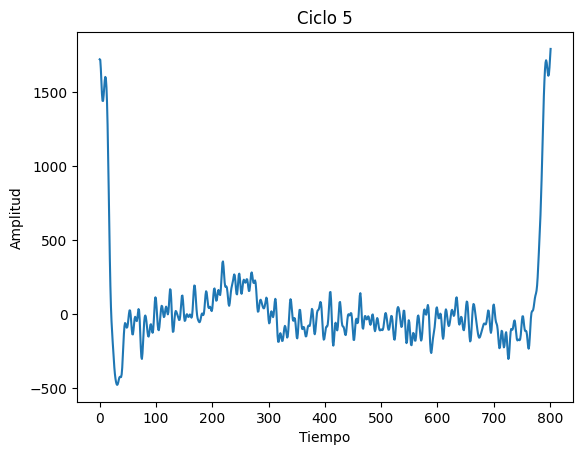


      La raiz cuadratica media (RMS) es: 242.75181110271285
      El valor promedio es: -27.94373421958412
      La varianza: 58147.589511512415
      La desviación estandar es: 241.1381129384412
      


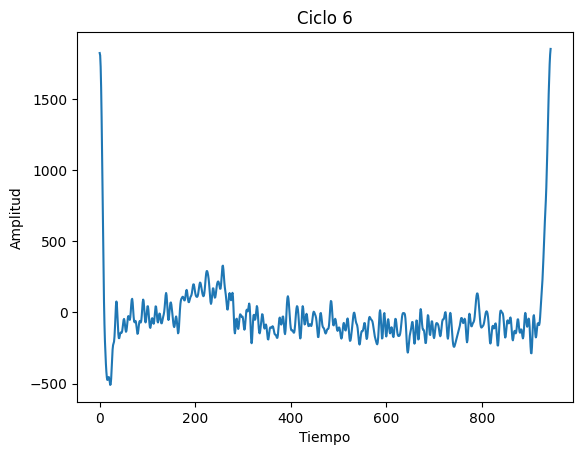


      La raiz cuadratica media (RMS) es: 278.7605904339659
      El valor promedio es: 0.43078685936823324
      La varianza: 77707.28120177508
      La desviación estandar es: 278.7602575723001
      


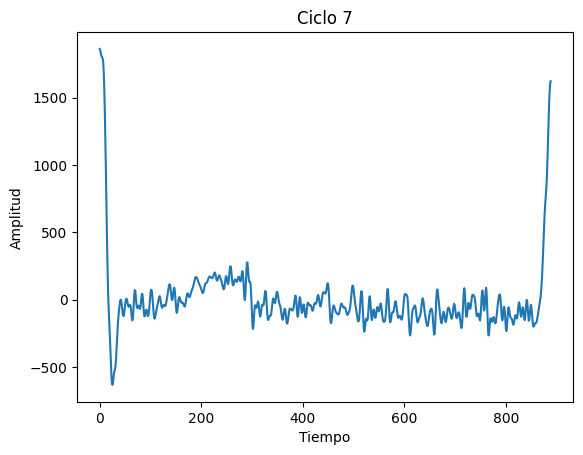


      La raiz cuadratica media (RMS) es: 317.37434949297585
      El valor promedio es: 21.40785342744196
      La varianza: 100268.18152771876
      La desviación estandar es: 316.6515143303735
      


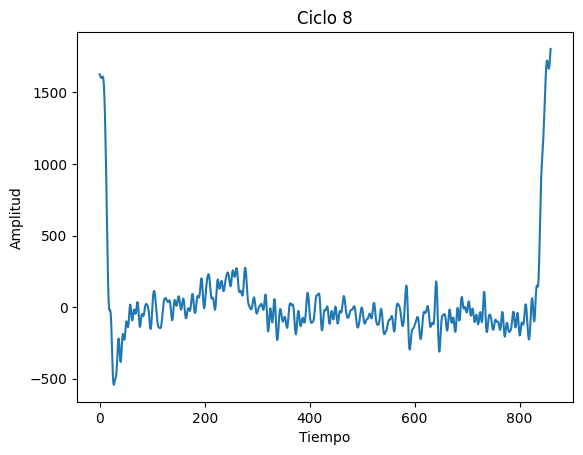


      La raiz cuadratica media (RMS) es: 268.1202944748422
      El valor promedio es: -10.175289840749373
      La varianza: 71784.95578593282
      La desviación estandar es: 267.9271464147163
      


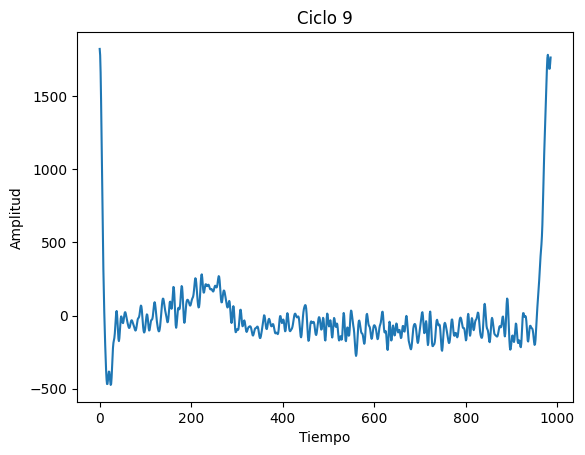


      La raiz cuadratica media (RMS) es: 261.8371878016648
      El valor promedio es: 8.81210265962322
      La varianza: 68481.05976260055
      La desviación estandar es: 261.68886060090625
      


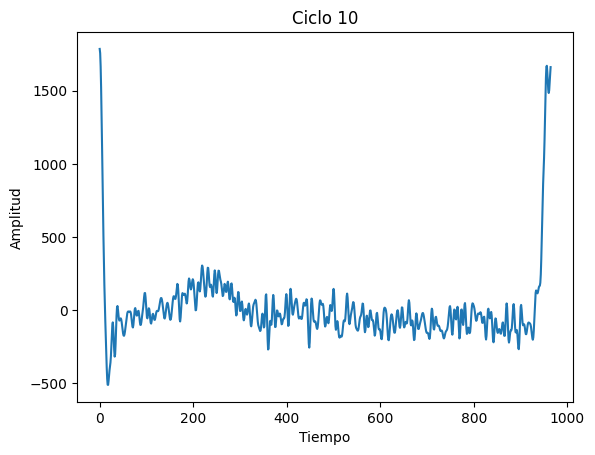


      La raiz cuadratica media (RMS) es: 275.9849716064196
      El valor promedio es: -8.906158250191359
      La varianza: 76088.38489781879
      La desviación estandar es: 275.8412313230544
      


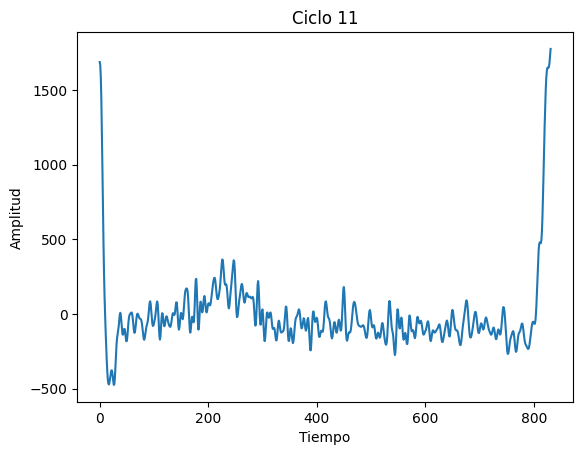


      La raiz cuadratica media (RMS) es: 306.654995870951
      El valor promedio es: 13.21327398140507
      La varianza: 93862.69588330528
      La desviación estandar es: 306.3701941823083
      


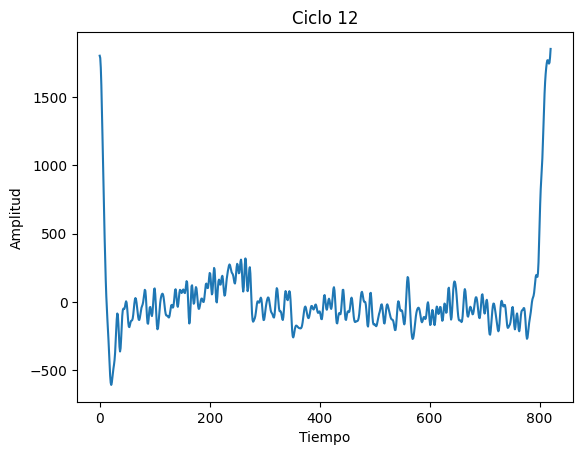


      La raiz cuadratica media (RMS) es: 296.5959741668655
      El valor promedio es: -4.203262548456708
      La varianza: 87951.50447594067
      La desviación estandar es: 296.56618903027476
      


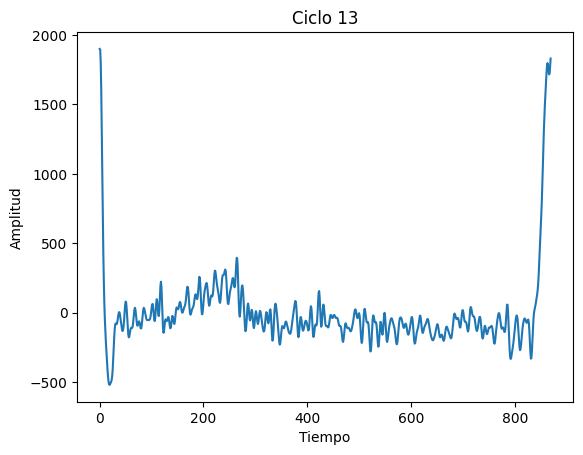


      La raiz cuadratica media (RMS) es: 277.93205015914145
      El valor promedio es: -14.969688987125844
      La varianza: 77022.13291729224
      La desviación estandar es: 277.52861639350317
      


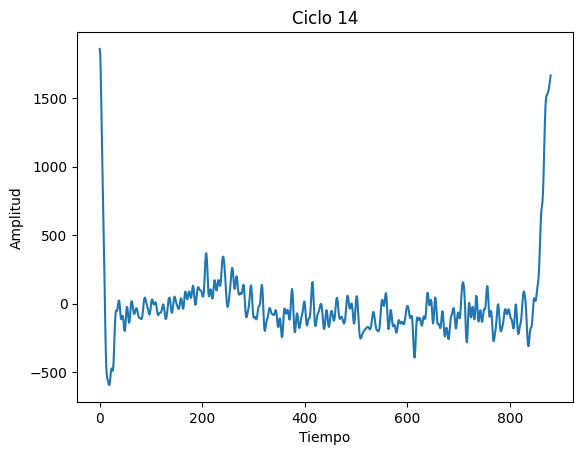


      La raiz cuadratica media (RMS) es: 300.6190220340886
      El valor promedio es: 27.108316233516877
      La varianza: 89636.93559971548
      La desviación estandar es: 299.39428117403224
      


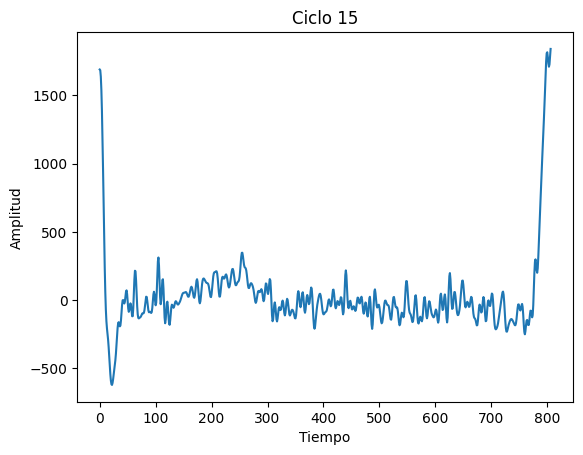

In [13]:
# Identificar picos en la señal ECG
peaks, _ = find_peaks(cF, distance=500)  

# Extraer ciclos de pico a pico
cycles = []
for i in range(15):
    cycle = cF[peaks[i]:peaks[i + 1]]
    cycles.append(cycle)


for i, cycle in enumerate(cycles):
    rms= RMS(cycle)
    mean = np.mean(cycle)
    var = np.var(cycle)
    std = np.std(cycle)
    print (f'''
      La raiz cuadratica media (RMS) es: {rms}
      El valor promedio es: {mean}
      La varianza: {var}
      La desviación estandar es: {std}
      ''')
    plt.figure()  # Crear una nueva figura
    plt.plot(cycle)
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title(f'Ciclo {i + 1}')
    plt.show()



Para determinar si una señal es estacionaria, debes verificar si sus propiedades estadísticas (como la media y la varianza) permanecen constantes a lo largo del tiempo. 

Para cada ciclo tenemos que: Ciclo 1 El valor promedio es: 74.009,La varianza: 96684.314. Ciclo 2 El valor promedio es: -1.46,La varianza: 104790.465. Ciclo 3 El valor promedio es: -10.433 La varianza: 82451.251. Ciclo 4 El valor promedio es: -20.975 La varianza: 46839.019. Ciclo 5  El valor promedio es: 40.871, La varianza: 114850.020. Ciclo 6 El valor promedio es: -27.943.La varianza: 58147.589. Ciclo 7 El valor promedio es: 0.430, La varianza: 77707.281.

Una información importante para analizar si una señal tiene comportamiento estacionario, es que la varianza a través de los ciclos sea constante, esto significaria que la dispersión de los datos respecto a la media del ciclo no estan variando mucho de un ciclo a otro. En este caso podemos notar que la varianza va en algunos casos a 50000 mientras en otros casos va incluso hasta mas de 100000, esto indica que no hay un comportamiento constante de la varianza, lo que puede indicar que no haya un comportamiento estacionario en la señal dada.

6. Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la
estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).

Iniciamos verificando normalidad, se usa Kolmogorov-Smirnov, pues son más de 50 datos

In [14]:
ciclo1=cycles[1]
ciclo2= cycles[4]

stat, p_value = stats.kstest(ciclo1, 'norm')
if p_value > 0.05:
    print('Los datos en el ciclo 2 parecen seguir una distribución normal (no se rechaza H0)')
else:
    print('Los datos en el ciclo 2 no parecen seguir una distribución normal (se rechaza H0)')

stat, p_value = stats.kstest(ciclo2, 'norm')
if p_value > 0.05:
    print('Los datos en el ciclo 5 parecen seguir una distribución normal (no se rechaza H0)')
else:
    print('Los datos en el ciclo 5 no parecen seguir una distribución normal (se rechaza H0)')

Los datos en el ciclo 2 no parecen seguir una distribución normal (se rechaza H0)
Los datos en el ciclo 5 no parecen seguir una distribución normal (se rechaza H0)


Al rechazar la hipotesis de que sea una distribución normal en ambos ciclos, se tiene que entonces se rechaza la idea de utilizar una prueba T, puesto que la prueba T solo puede utilizarse si se tiene una distribución normal.

Ahora hacemos prueba de homocedasticidad, usando Levene

In [15]:
stat, p_value = stats.levene(ciclo1, ciclo2)

if p_value > 0.05:
    print('Los ciclos 2 y 5 parecen tener varianzas iguales (no se rechaza H0)')
else:
    print('Los ciclos 2 y 5 no parecen tener varianzas iguales (se rechaza H0)')

Los ciclos 2 y 5 parecen tener varianzas iguales (no se rechaza H0)


La prueba U de Mann-Whitney no requiere que haya homocedasticidad, pues no requiere una igualdad de varianzas a diferencia de la prueba T de student, aún asi da la coincidencia que los ciclos 2 y 5 tienen una igualdad de varianzas.

Debido a que no hay normalidad entre los datos, pero si homocedasticidad se realiza una prueba U de Mann-Whitney

In [16]:
stat, p_value = stats.mannwhitneyu(ciclo1, ciclo2, alternative='two-sided')

print(p_value)

if p_value > 0.05:
    print('No hay diferencias significativas entre los ciclos 2 y 5 (no se rechaza H0)')
else:
    print('Hay diferencias significativas entre los ciclos 2 y 5 (se rechaza H0)')
    

4.087714041797395e-09
Hay diferencias significativas entre los ciclos 2 y 5 (se rechaza H0)


Esto respalda los resultados anteriores, que muestran que en la mayoria de los ciclos no hay una varianzas similares entre ellos, por lo que es muy probable que no haya una estacionareidad entre ciclos.

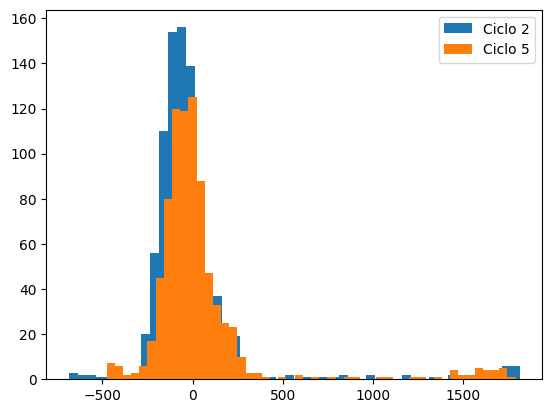

In [17]:
plt.figure()
plt.hist(ciclo1,bins = 50)
plt.hist(ciclo2, bins = 50)
plt.legend(["Ciclo 2", "Ciclo 5"])
plt.show()

Esta grafica permite analizar de mejor manera la distribución de los dos ciclos, en primera instancia se puede notar que aunque tienen comportamientos similares, pues hay un solapamiento de los histogramas, existen aun asi diferencias en la ubicación y dispersión, tambien en los picos que alcanza el ciclo #2 que son mas altos y un poco mas a la izquierda, mientras que el ciclo 5 alcanza picos mas bajos pero mas a la derecha. Tambien puede notarse que el ciclo 5 tiene una mayor dispersion en valores altos, mientras que el ciclo 2 parece tener un pico grande en los valores altos.

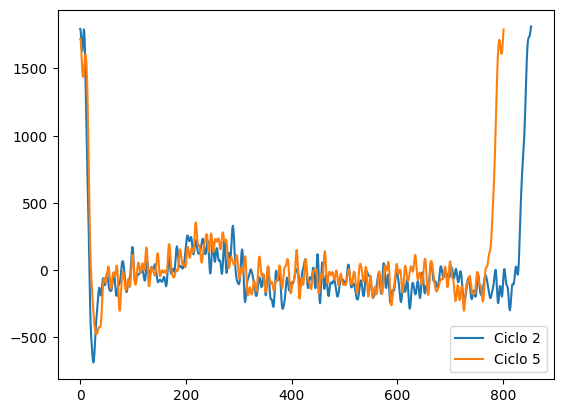

In [18]:
plt.figure()
plt.plot(ciclo1)
plt.plot(ciclo2)
plt.legend(['Ciclo 2','Ciclo 5'])
plt.show()

Otro punto a analizar aqui, es que como los ciclos han sido analizados por separación de picos, es importante notar que no todos los ciclos entonces tendrán el mismo numero de datos, en este caso por ejemplo, el ciclo 5 es un poco mas pequeño, lo cual puede explicar su distribución menor en los valores que alcanzan el pico respecto al ciclo 2.

6. Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad)

In [20]:
result = adfuller(ciclo1)

print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

# Interpretación
alpha = 0.05
if result[1] > alpha:
    print('La serie tiene una raíz unitaria y no es estacionaria (no se rechaza H0)')
else:
    print('La serie es estacionaria (se rechaza H0)')

Estadístico ADF: -1.5272583586747794
Valor p: 0.5199865228062833
Valores críticos: {'1%': -3.4382057088878644, '5%': -2.865007578546518, '10%': -2.5686164240381513}
La serie tiene una raíz unitaria y no es estacionaria (no se rechaza H0)


In [21]:
result = adfuller(ciclo2)

print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

# Interpretación
alpha = 0.05
if result[1] > alpha:
    print('La serie tiene una raíz unitaria y no es estacionaria (no se rechaza H0)')
else:
    print('La serie es estacionaria (se rechaza H0)')

Estadístico ADF: -1.956234558139094
Valor p: 0.306086045641069
Valores críticos: {'1%': -3.4387291412780177, '5%': -2.8652383048736056, '10%': -2.568739332674375}
La serie tiene una raíz unitaria y no es estacionaria (no se rechaza H0)


In [22]:
result = adfuller(cF)

print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

# Interpretación
alpha = 0.05
if result[1] > alpha:
    print('La serie tiene una raíz unitaria y no es estacionaria (no se rechaza H0)')
else:
    print('La serie es estacionaria (se rechaza H0)')

Estadístico ADF: -30.33094919154554
Valor p: 0.0
Valores críticos: {'1%': -3.4305630243276717, '5%': -2.861634151073544, '10%': -2.5668201137295887}
La serie es estacionaria (se rechaza H0)
